<center>Учреждение образования</center>
<center>«Белорусский государственный университет информатики и радиоэлектроники»</center>
<br><br>
<center>Кафедра информатики</center>
<br><br><br><br><br><br><br><br><br><br>
<center>Лабораторная работа №2</center>
<center>Логистическая регрессия. Многоклассовая классификация</center>
<br><br><br><br><br><br><br><br>

<p style='text-align: right;'>
Выполнил:
Полевой Александр Вадимович <br>
магистрант кафедры информатики <br>      
группа № 858641	
<br><br><br><br>
Проверил:     Стержанов Максим Валерьевич
</p>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

<center>
Минск 2019
</center>


Набор данных ex2data1.txt представляет собой текстовый файл, содержащий информацию об оценке студента по первому экзамену (первое число в строке), оценке по второму экзамену (второе число в строке) и поступлении в университет (0 - не поступил, 1 - поступил).

**1.Загрузите данные ex2data1.txt из текстового файла.**

In [78]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
from scipy import optimize
import scipy.io

%matplotlib inline

dataset = pandas.read_csv('data/ex2data1.txt', header=None, names=['exam_1', 'exam_2', 'result'])
dataset.head()

,exam_1,exam_2,result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


**2. Постройте график, где по осям откладываются оценки по предметам, а точки обозначаются двумя разными маркерами в зависимости от того, поступил ли данный студент в университет или нет.**

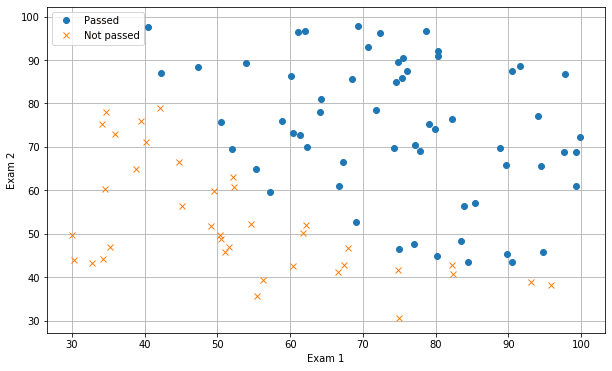

In [58]:
def normalizer(df):
    mean = df.mean().values
    rng = (df.max()-df.min()).values
    
    def norm_func(val):
        return (val - mean) / rng
    
    def denorm_func(val):
        return val * rng + mean
    
    return norm_func, denorm_func

ds = dataset.copy()
ds.insert(0, '', 1)
orig_X = ds.drop('result', axis=1).values

norm_func, denorm_func = normalizer(dataset.copy().drop('result', axis=1))

norm_df = norm_func(dataset.copy().drop('result', axis=1)) 
norm_df.insert(0, '', 1)

norm_X = norm_df.values

Y = ds['result'].values.reshape(-1, 1)

plt.figure(figsize=(10,6))
plt.plot(dataset[Y==1]['exam_1'],dataset[Y==1]['exam_2'], 'o', label='Passed')
plt.plot(dataset[Y==0]['exam_1'],dataset[Y==0]['exam_2'], 'x', label='Not passed')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend(loc=2)
plt.grid(True)


**3. Реализуйте функции потерь J(θ) и градиентного спуска для логистической регрессии с использованием векторизации.**

In [59]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

def h(theta, X):
    return sigmoid(np.dot(X, theta))

def J(theta, X, Y):
    m = len(X)
    h_res = h(theta, X)
    
    e1 = np.dot(-Y.T, np.log(h_res))
    e2 = np.dot((1 - Y).T, np.log(1 - h_res))
    
    return (1 / m) * (e1 - e2).item()

initial_theta = np.zeros((orig_X.shape[1],1))
J(initial_theta, orig_X, Y)

0.6931471805599453

θ = [ 1.71388635 14.35013779 13.71561879]
J(θ) = 0.2034984061429642


Text(0, 0.5, 'J(θ)')

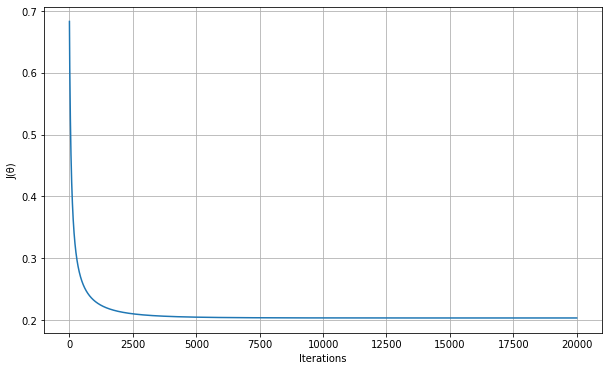

In [16]:
def gradient_descent(X, Y, iterations = 500, alpha = 0.01):
    n = X.shape[1]
    m = len(Y)
    theta = np.zeros([n, 1])    
    j_hist = []
    
    for i in range(iterations):
        h_res = h(theta, X)
        dt = np.dot(X.T, (h_res - Y))
        theta = theta - (alpha / m) * dt
        j_hist.append(J(theta, X, Y))
    return theta, np.asarray(j_hist)

#----------

gd_theta, j_hist = gradient_descent(norm_X, Y, 20000, 0.5)

print(f'\u03B8 = {gd_theta.reshape(-1)}')
print(f'J(\u03B8) = {j_hist[-1]}')

plt.figure(figsize=(10,6))
plt.plot(range(len(j_hist)), j_hist)
plt.grid(True)
plt.xlabel("Iterations")
plt.ylabel("J(\u03B8)")

**4. Реализуйте другие методы (как минимум 2) оптимизации для реализованной функции стоимости (например, Метод Нелдера — Мида, Алгоритм Бройдена — Флетчера — Гольдфарба — Шанно, генетические методы и т.п.). Разрешается использовать библиотечные реализации методов оптимизации (например, из библиотеки scipy).**

In [60]:
def nelder_mead(X, Y):
    result = optimize.minimize(J, x0=np.zeros([X.shape[1], 1]), args=(X, Y), method='Nelder-Mead')
    return result.x, result.fun

def bfgs(X, Y):
    result = optimize.minimize(J, x0=np.zeros([X.shape[1], 1]), args=(X, Y), method='BFGS')
    return result.x, result.fun

#----------

%time
nm_theta, nm_cost = nelder_mead(norm_X, Y)

print(f'\u03B8 = {nm_theta}')
print(f'J(\u03B8) = {nm_cost}\n')

%time
bfg_theta, bfg_cost = bfgs(norm_X, Y)

print(f'\u03B8 = {bfg_theta}')
print(f'J(\u03B8) = {bfg_cost}')

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 19.8 µs
θ = [ 1.71844706 14.3885508  13.75365682]
J(θ) = 0.20349770159025407

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 8.11 µs
θ = [ 1.71892115 14.39128206 13.75790149]
J(θ) = 0.2034977115835461


**5. Реализуйте функцию предсказания вероятности поступления студента в зависимости от значений оценок по экзаменам.**

In [61]:
def predict(theta, x):
    new_x = np.insert(norm_func(x), 0, 1, axis=0).reshape(1, -1)
    return (h(theta, new_x) >= 0.5).astype(int)  

predict(gd_theta, [70, 55]).item()

1

**6. Постройте разделяющую прямую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 2.**

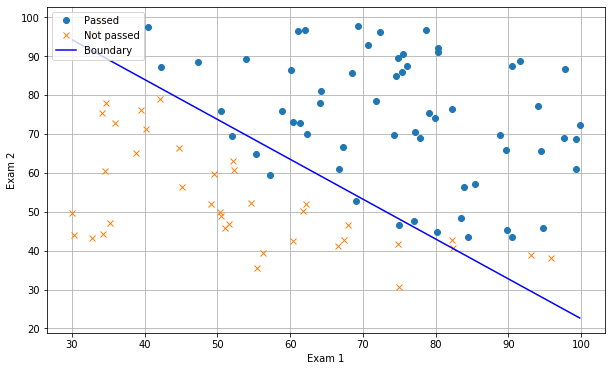

In [62]:
boundary_x = np.array([np.min(norm_X[:,1]), np.max(norm_X[:,1])])
boundary_y = (-1./gd_theta[2])*(gd_theta[0] + gd_theta[1]*boundary_x)

line =  np.hstack((boundary_x.reshape(-1, 1), boundary_y.reshape(-1, 1)))
line = denorm_func(line)

plt.figure(figsize=(10,6))
plt.plot(dataset[Y==1]['exam_1'], dataset[Y==1]['exam_2'], 'o', label='Passed')
plt.plot(dataset[Y==0]['exam_1'], dataset[Y==0]['exam_2'], 'x', label='Not passed')
plt.plot(line[:,0], line[:,1],'b-',label='Boundary')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend(loc=2)
plt.grid(True)

**7. Загрузите данные ex2data2.txt из текстового файла.**
Набор данных ex2data2.txt представляет собой текстовый файл, содержащий информацию о результате первого теста (первое число в строке) и результате второго теста (второе число в строке) изделий и результате прохождения контроля (0 - контроль не пройден, 1 - контроль пройден).

In [79]:
dataset2 = pandas.read_csv('data/ex2data2.txt', header=None, names=['test_1', 'test_2', 'result'])
dataset2.head()

,test_1,test_2,result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


**8. Постройте график, где по осям откладываются результаты тестов, а точки обозначаются двумя разными маркерами в зависимости от того, прошло ли изделие контроль или нет.**

X2.shape = (118, 2)
Y2.shape = (118, 1)


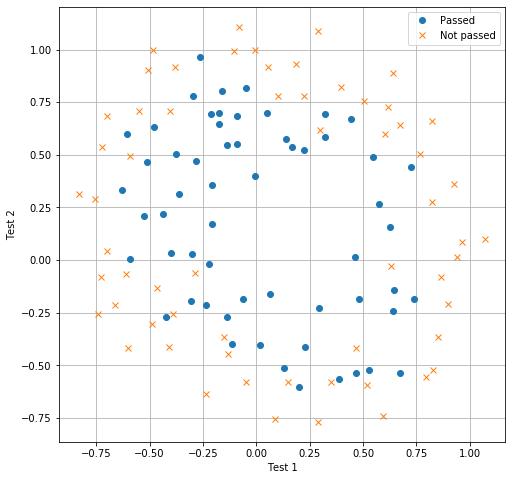

In [64]:
tmp_ds = dataset2.copy()

X2 = tmp_ds.drop('result', axis=1).values
print(f'X2.shape = {X2.shape}')

Y2 = tmp_ds['result'].values.reshape(-1, 1)
print(f'Y2.shape = {Y2.shape}')

r2_pass = Y2 == 1
r2_fail = Y2 == 0

def draw_tests_data():
    plt.figure(figsize=(8,8))
    plt.plot(dataset2[r2_pass]['test_1'], dataset2[r2_pass]['test_2'], 'o', label='Passed')
    plt.plot(dataset2[r2_fail]['test_1'], dataset2[r2_fail]['test_2'], 'x', label='Not passed')
    plt.xlabel('Test 1')
    plt.ylabel('Test 2')
    plt.legend()
    plt.grid(True)
    
draw_tests_data()

**9. Постройте все возможные комбинации признаков x1 (результат первого теста) и x2 (результат второго теста), в которых степень полинома не превышает 6, т.е. 1, x1, x2, x12, x1x2, x22, …, x1x25, x26 (всего 28 комбинаций).**

In [65]:
def gen_polynom_matrix(X, degrees):
    # первый столбик с единицами
    m = len(X)
    result = np.ones([m, 1])
    
    for i in range(1, degrees+1):
        for j in range(0, i+1):
            x1 = X[:,0] ** (i-j)
            x2 = X[:,1] ** (j)
            new_column = (x1 * x2).reshape(m, 1) 
            result = np.hstack((result, new_column ))
            
    return result

X2_new = gen_polynom_matrix(X2, 6)
X2_new.shape

(118, 28)

**10. Реализуйте L2-регуляризацию для логистической регрессии и обучите ее на расширенном наборе признаков методом градиентного спуска.**

In [66]:
def J_reg(theta, X, Y, l=0):
    m = len(X)
    h_res = h(theta, X)
    e1 = np.dot(-Y.T, np.log(h_res))
    e2 = np.dot((1 - Y).T, np.log(1 - h_res))
    reg = l/2 * np.sum(np.dot(theta[1:].T, theta[1:]))
    return (1 / m) * ((e1 - e2) + reg).item()

def gd_step(theta, X, Y, lam=0):
    m = len(Y)
    h_res = h(theta, X)
    res = (1./m) * np.dot(X.T, (h_res - Y))
    res[1:] = res[1:] + (lam / m) * theta[1:]
    return res

def gd_reg(X, Y, iterations = 200, alpha = 0.01, l=0):
    n = X.shape[1]
    m = len(Y)
    theta = np.zeros([n, 1])    
    j_hist = []
    for i in range(iterations):         
        theta = theta - alpha * gd_step(theta, X, Y, l)
        j_hist.append(J_reg(theta, X, Y, l))
    return theta, np.asarray(j_hist)

J_reg(np.asarray([0, 0.5, 3]), norm_X, Y, 0.1)
gd_step(np.zeros([X2.shape[1], 1]), X2, Y2)
gd_reg_theta, j_reg_hist = gd_reg(X2, Y2, 10000)

gd_reg_theta_2, j_reg_hist_2 = gd_reg(X2_new, Y2, 100)

print(f'\u03B8 = {gd_reg_theta.reshape(-1)}')
print(f'J(\u03B8) = {j_reg_hist[-1]}\n')

print(f'\u03B8 = {gd_reg_theta_2.reshape(-1)}')
print(f'J(\u03B8) = {j_reg_hist_2[-1]}')

θ = [-0.30674593 -0.02682097]
J(θ) = 0.6902628739903155

θ = [-0.00166241 -0.01681749  0.00281924 -0.04800576 -0.01140428 -0.03447094
 -0.01695299 -0.00686679 -0.0078626  -0.02109818 -0.03785319 -0.00213995
 -0.01231582 -0.00306428 -0.03684644 -0.01883949 -0.00413983 -0.00320314
 -0.00555821 -0.00436659 -0.02883546 -0.02987035 -0.00101293 -0.00609573
 -0.0003745  -0.00696725 -0.00136474 -0.03657153]
J(θ) = 0.6818261709936212


**11. Реализуйте другие методы оптимизации.**

In [67]:
init_theta = np.zeros([X2_new.shape[1], 1]).flatten()
result = optimize.minimize(J_reg, x0=init_theta, args=(X2_new, Y2.flatten(), 0), method='BFGS', jac=gd_step)
result.x, result.fun

(array([   35.10191072,    44.11915513,    69.27186932,  -344.27905054,
         -198.23461597,  -184.22839935,  -295.82038448,  -621.7326092 ,
         -510.84921955,  -328.31175034,  1094.70029673,  1269.58579578,
         1757.74895386,   900.93783062,   436.58879066,   471.12027791,
         1236.2384289 ,  1822.81991132,  1929.66710272,  1131.05282313,
          463.79912903, -1142.11730981, -2020.95893299, -3463.39937364,
        -3484.51005559, -3252.2669988 , -1546.00911374,  -510.41256813]),
 0.22456873200303104)

**12. Реализуйте функцию предсказания вероятности прохождения контроля изделием в зависимости от результатов тестов.**

In [68]:
def predict_2(theta, x):
    return (h(theta, x) >= 0.5).astype(int)  

print(f'Should equal to 1 - {predict_2(gd_reg_theta, [-0.25, 0.5]).item()}')
print(f'Should equal to 0 - {predict_2(gd_reg_theta, [1, 1]).item()}')

Should equal to 1 - 1
Should equal to 0 - 0


**13. Постройте разделяющую кривую, полученную в результате обучения модели. Совместите прямую с графиком из пункта 7.**

In [69]:
def bfgs_cust_reg(X, Y, l=0):    
    init_theta = np.zeros([X.shape[1], 1]).flatten()
    
    result = optimize.minimize(J_reg, x0=init_theta, args=(X, Y.flatten(), l), method='BFGS', jac=gd_step)
    return result.x, result.fun

def plot_boundary(X, Y, l=0.):
    theta, j_h = bfgs_cust_reg(X, Y, l)
    
    u = np.linspace(-1, 1.5 , 50)
    v = np.linspace(-1, 1.5 , 50)
    z = np.zeros((len(u), len(v)))
    
    for i in range(len(u)):
        for j in range(len(v)):
            fearure_row = gen_polynom_matrix(np.array([[u[i], v[j]]]), 6)
            z[i][j] = h(theta, fearure_row)
     
    z = z.T
    
    draw_tests_data()
    c = plt.contour( u, v, z, 0, colors='blue')
    c.collections[0].set_label(f'\u03bb = {l}')
    plt.legend()
    plt.title("Separator")

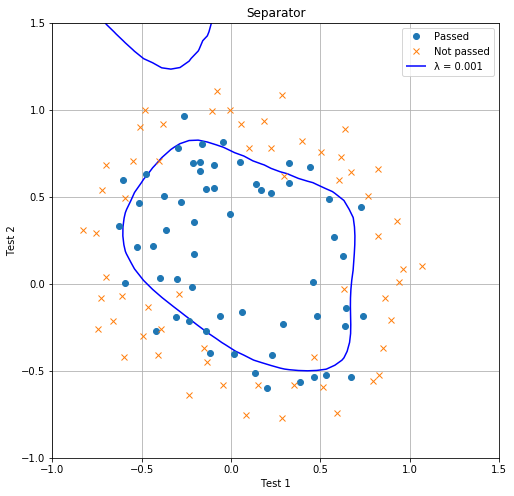

In [70]:
plot_boundary(X2_new, Y2, 0.001)

**14. Попробуйте различные значения параметра регуляризации λ. Как выбор данного значения влияет на вид разделяющей кривой? Ответ дайте в виде графиков.**

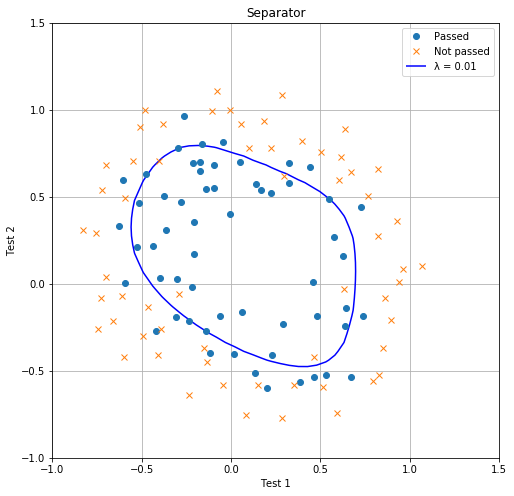

In [71]:
plot_boundary(X2_new, Y2, 0.01)

**15. Загрузите данные ex2data3.mat из файла.**

Набор данных ex2data3.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит 5000 изображений 20x20 в оттенках серого. Каждый пиксель представляет собой значение яркости (вещественное число). Каждое изображение сохранено в виде вектора из 400 элементов. В результате загрузки набора данных должна быть получена матрица 5000x400. Далее расположены метки классов изображений от 1 до 9 (соответствуют цифрам от 1 до 9), а также 10 (соответствует цифре 0).

In [80]:
img_data = scipy.io.loadmat('data/ex2data3.mat')
ex_3_X, ex_3_Y = img_data['X'], img_data['y']
ex_3_X.shape

(5000, 400)

**16. Визуализируйте несколько случайных изображений из набора данных. Визуализация должна содержать каждую цифру как минимум один раз.**

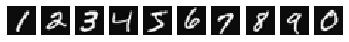

In [73]:
vals, indexes = np.unique(ex_3_Y, return_index=True)
def img_from_raw(data):
    return data.reshape(20, 20).T

fig, axs = plt.subplots(1, 10)
for i in range(len(indexes)):
    index = indexes[i]
    val = vals[i]
    axs[i].imshow(img_from_raw(ex_3_X[index]), cmap='gray')
    axs[i].axis("off")
    
plt.show()

**17. Реализуйте бинарный классификатор с помощью логистической регрессии с использованием векторизации (функции потерь и градиентного спуска).**

In [74]:
ex_3_m = len(ex_3_Y)
ex_3_n = ex_3_X.shape[1]

print(f'm = {ex_3_m}, n = {ex_3_n}')

ex_3_init_theta = np.zeros([ex_3_n, 1])
ex_3_init_theta.shape

m = 5000, n = 400


(400, 1)

**19. Реализуйте многоклассовую классификацию по методу “один против всех”.**

In [75]:

def fmin_cg_alg(X, Y, lam=0):
    init_theta = np.zeros([X.shape[1], 1]).flatten()
    result = optimize.fmin_cg(J_reg, fprime=gd_step, x0=init_theta, args=(X, Y.flatten(), lam), maxiter=50, disp=False, full_output=True)
    return result[0], result[1]

def train_classifier(X, Y, lam=0):
    m = X.shape[0]
    n = X.shape[1]
    classes_count = 10
    thetas = np.zeros([classes_count, n])
    for klass in range(classes_count):
        class_index = klass if klass else 10 # 10 - это 0
        print(f'{klass} => {class_index}')
        replaced_Y = (Y == class_index).astype(int)
        #theta, cost = fmin_cg_alg(X, replaced_Y, lam)  # lam - 0.001 -> 95.6%
        theta, cost = bfgs_cust_reg(X, replaced_Y, lam) # lam - 0.001 -> 97.2%
        thetas[klass] = theta
    return thetas

ex_3_X_ext = np.hstack((np.ones((ex_3_m, 1)), ex_3_X))

thetas = train_classifier(ex_3_X_ext, ex_3_Y, 0.001)
thetas.shape

0 => 10


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


1 => 1


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


2 => 2


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


3 => 3


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


4 => 4


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


5 => 5
6 => 6


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


7 => 7


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


8 => 8
9 => 9


(10, 401)

**20. Реализуйте функцию предсказания класса по изображению с использованием обученных классификаторов.**

In [76]:
def predClass(thetas, x):
    return np.argmax(h(thetas.T, x))

x, y = ex_3_X_ext[3000], ex_3_Y[3000].item()

print(f'Class = {y}, predicted = {predClass(thetas, x)}')

Class = 6, predicted = 6


**21. Процент правильных классификаций на обучающей выборке должен составлять около 95%.**

In [77]:
def calc_accuracy(thetas, X, Y):
    m = X.shape[0]
    correct = 0
    
    for i in range(m):
        pred = predClass(thetas, X[i])
        pred = pred if pred else 10
        
        if pred == Y[i]:
            correct += 1

    return correct/m

print("Accuracy: %0.1f%%"%(100*calc_accuracy(thetas, ex_3_X_ext, ex_3_Y)))

Accuracy: 97.2%


**Вывод** 

В методе логической регрессии не производится предсказание значения числовой переменной исходя из выборки исходных значений. Вместо этого, значением функции является вероятность того, что данное исходное значение принадлежит к определенному классу

Основная идея такого типа регрессии заключается в том, что пространство исходных значений может быть разделено границей на две классифицированные области. При 2х измерениях это прямая линия, при трех - плоскость и тд. 

Для того, чтобы это работало точки исходных данных должны разделяться границей на две области. Если они удовлетворяют этому условию, то их можно назвать линейно разделяемыми. 